Importing libraries. pandas_profiling is not working

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import calmap
# from pandas_profiling import ProfileReport

Importing the data from CSV

In [5]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

About Dataset


Context

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

Attribute information

Invoice id: Computer generated sales slip invoice identification number
Branch: Branch of supercenter (3 branches are available identified by A, B and C).
City: Location of supercenters
Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
Gender: Gender type of customer
Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
Unit price: Price of each product in $
Quantity: Number of products purchased by customer
Tax: 5% tax fee for customer buying
Total: Total price including tax
Date: Date of purchase (Record available from January 2019 to March 2019)
Time: Purchase time (10am to 9pm)
Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
COGS: Cost of goods sold
Gross margin percentage: Gross margin percentage
Gross income: Gross income
Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Exploring the head of the data

In [70]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3
2019-03-25,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,18:30,Ewallet,597.73,4.761905,29.8865,4.1
2019-02-25,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,14:36,Ewallet,413.04,4.761905,20.6520,5.8
2019-02-24,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,11:38,Ewallet,735.60,4.761905,36.7800,8.0
2019-01-10,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,17:15,Credit card,72.52,4.761905,3.6260,7.2


To see columns individually

In [8]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [15]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [68]:
df.set_index('Date', inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [69]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


Univariate Analysis

First we state the questions we want to answer

Question 1: What does the ditribution of costomer ratings looks like? Is it skewed? 

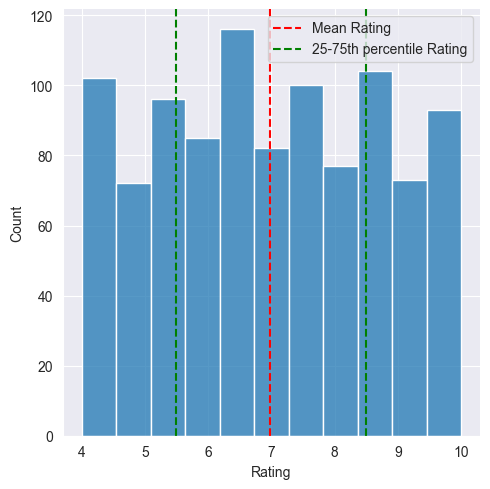

In [27]:
sns.displot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='Mean Rating')
plt.axvline(x=np.percentile(df['Rating'], 25), c='green', ls='--', label='25-75th percentile Rating')
plt.axvline(x=np.percentile(df['Rating'], 75), c='green', ls='--')
plt.legend()

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

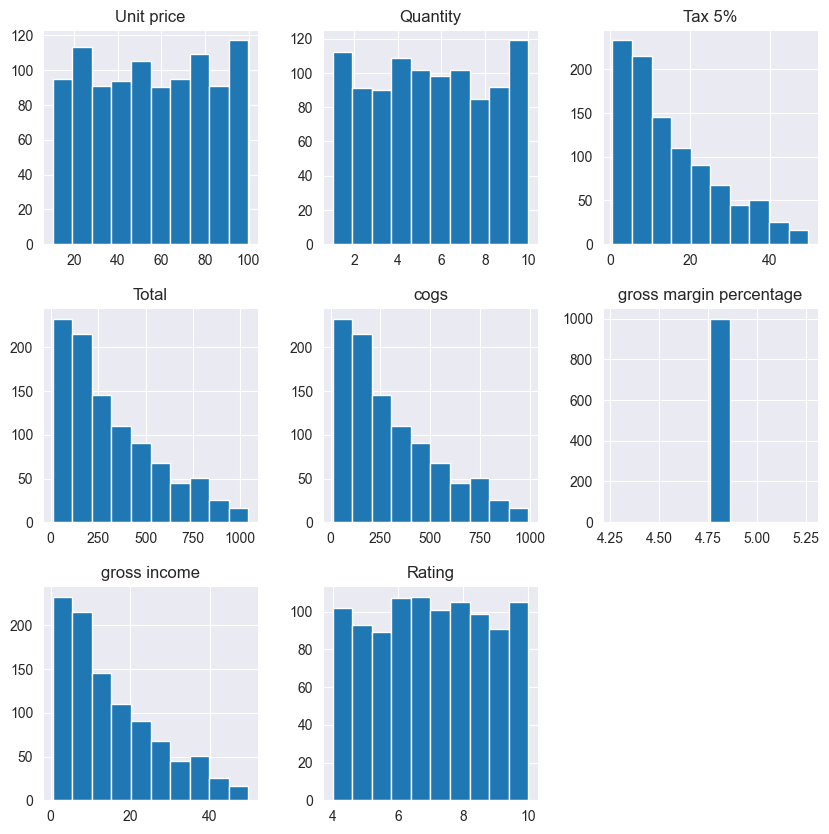

In [29]:
df.hist(figsize=(10, 10))

Question 2: Do the aggregate sales numbers differ between branches?

C:\Users\iastr\AppData\Local\Temp\ipykernel_12632\1548080756.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Branch', palette='Set3')


<Axes: xlabel='Branch', ylabel='count'>

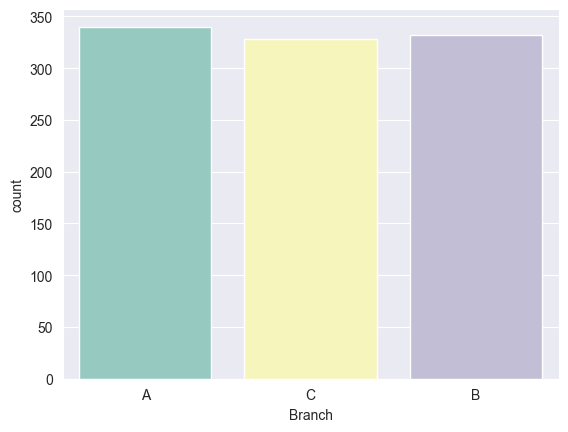

In [36]:
sns.countplot(data=df, x='Branch', palette='Set3')

In [37]:
df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

C:\Users\iastr\AppData\Local\Temp\ipykernel_12632\1685963601.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment', palette='Set3')


<Axes: xlabel='Payment', ylabel='count'>

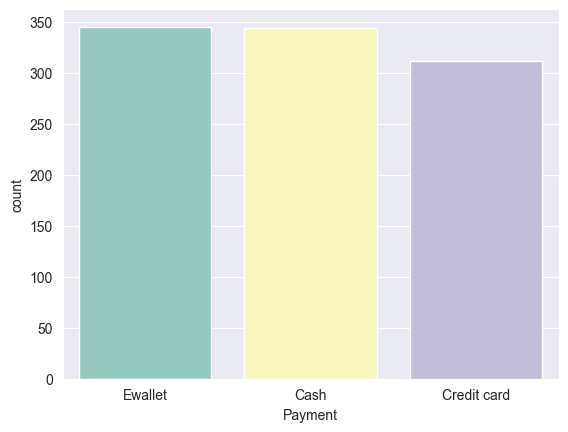

In [44]:
sns.countplot(data=df, x='Payment', palette='Set3')

Bivariate Analysis

Questions to ask

Question 3: Is there a relationshop between gross income and customer ratings?

<Axes: xlabel='Rating', ylabel='gross income'>

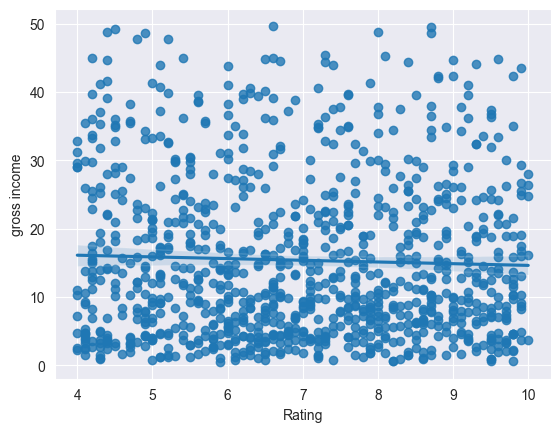

In [49]:
sns.regplot(data=df, x='Rating', y='gross income')

<Axes: xlabel='Branch', ylabel='gross income'>

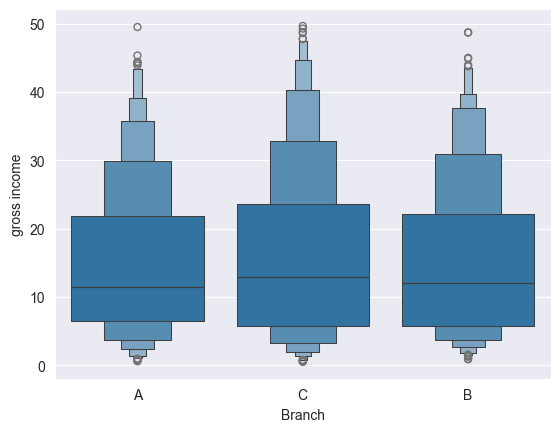

In [50]:
sns.boxenplot(data=df, x='Branch', y='gross income')

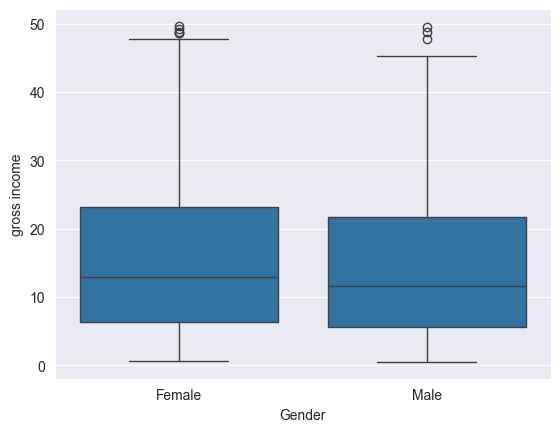

In [51]:
boxplot = sns.boxplot(data=df, x='Gender', y='gross income')

Question 4: Is there any time trends?

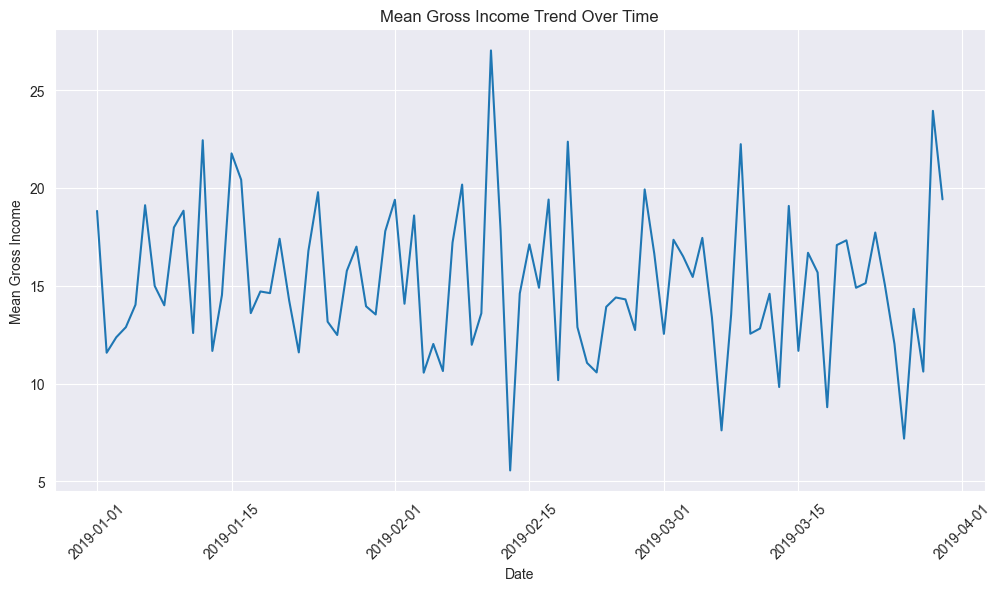

In [82]:
# Grouping by date and calculating the mean gross income for each date
daily_gross_income = df.groupby(df.index.date)['gross income'].mean()

# Plotting the mean gross income trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_gross_income.index, y=daily_gross_income.values)
plt.xlabel('Date')
plt.ylabel('Mean Gross Income')
plt.title('Mean Gross Income Trend Over Time')
plt.xticks(rotation=45)
plt.show()


Plotting all possible relationships

Useful for smaller datasets. With less var

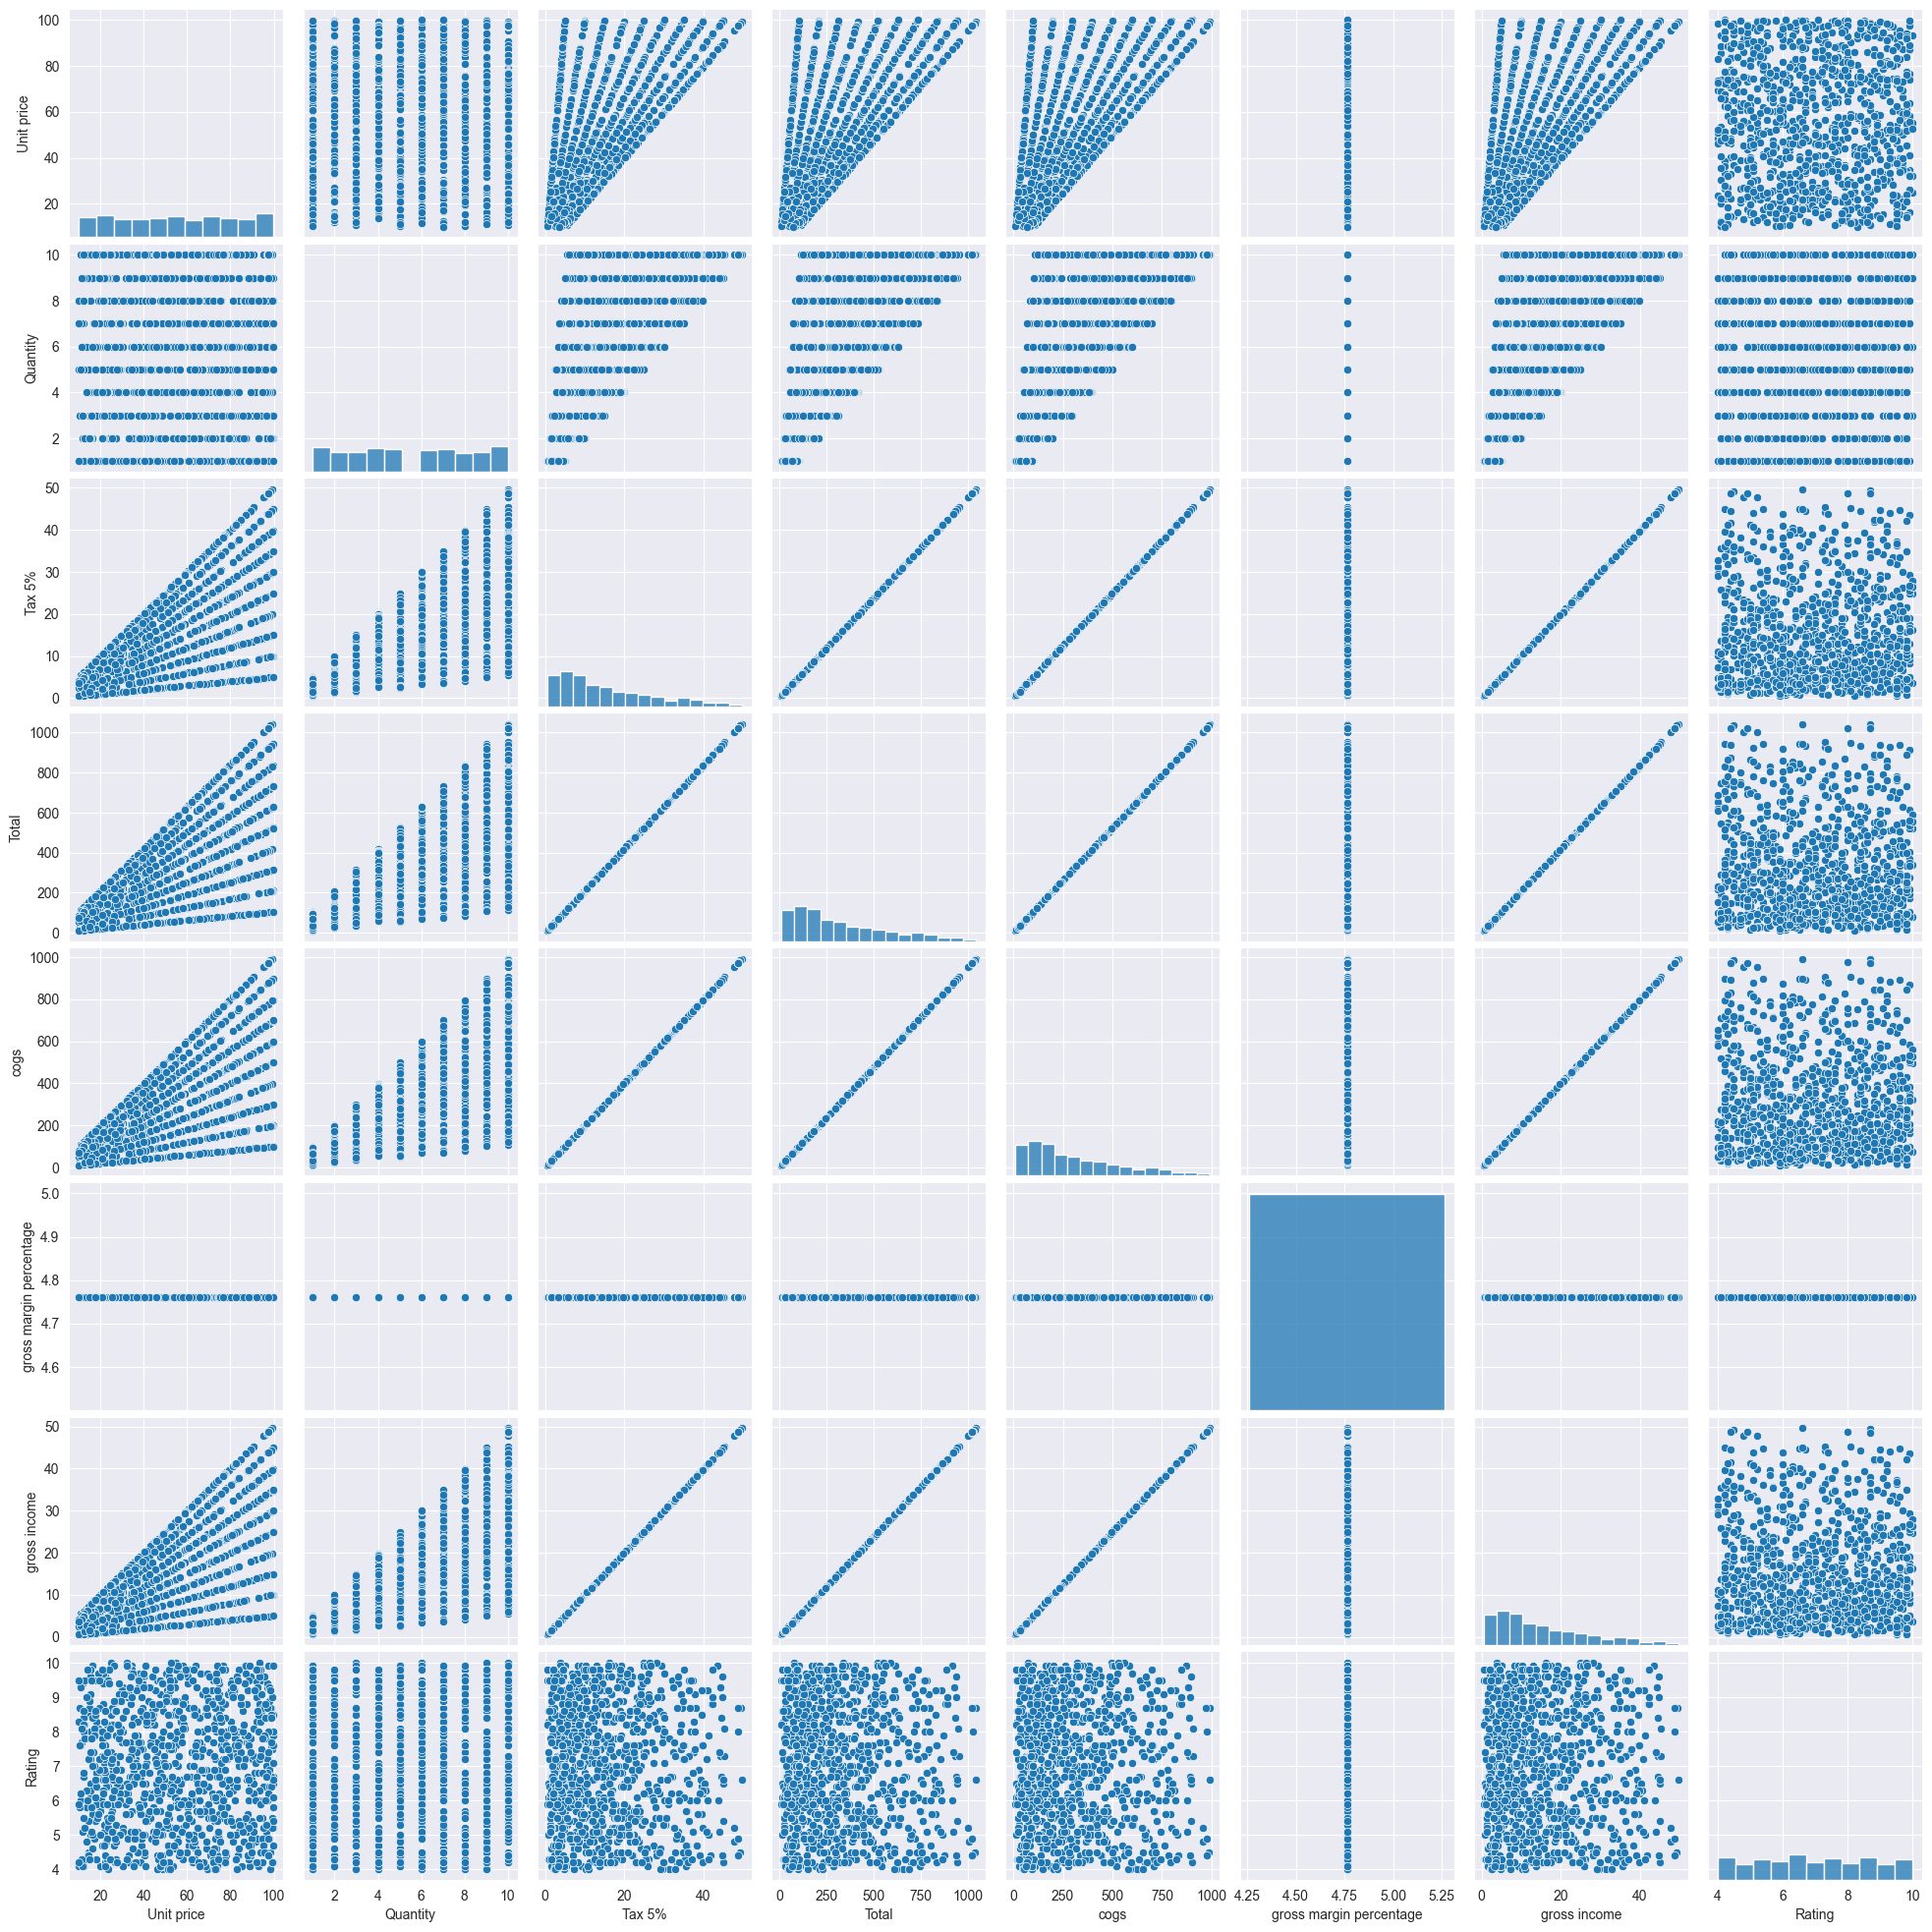

In [83]:
# Pairing all the possibilities
sns.pairplot(df)

Dealing with Duplicate Rows and Missing Values

Duplicate Rows

In [87]:
df.duplicated().sum()

0

Missing Values 

In [92]:
df.isna().sum()/len(df) # To see number of missing values in % (/len(df)

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

<Axes: ylabel='Date'>

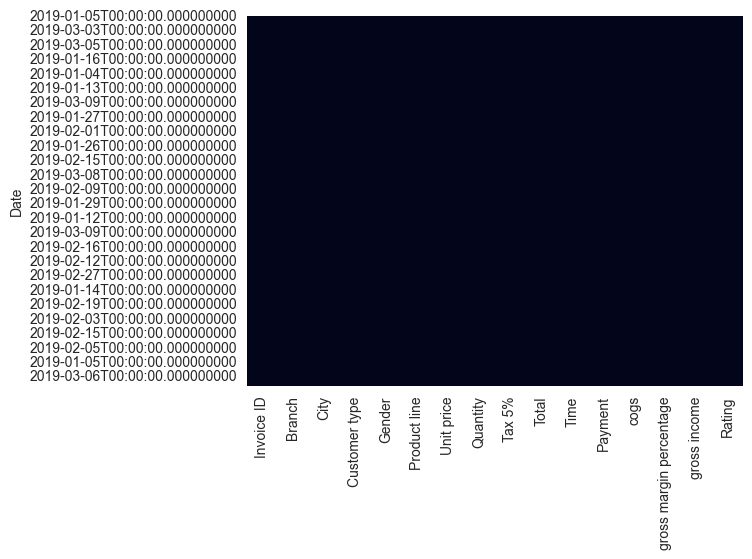

In [96]:
sns.heatmap(df.isnull(), cbar=False) # We do not have missing values, but this way we could see where they are

If we had missing values:

In [ ]:
# Filling the missing values with zero
df.fillna(0)
# Filling the missing values with the mean of each column
df.fillna(df.mean(), inplace=True) # inplace=True to change it permanently

The above is for the numerical values. To fill the categorical missing values we can run the following:

In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)

Correlation Analysis

In [98]:
np.corrcoef(df['gross income'], df['Rating'])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [104]:
numeric_df = df.select_dtypes(include=['int', 'float'])
np.round(numeric_df.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


<Axes: >

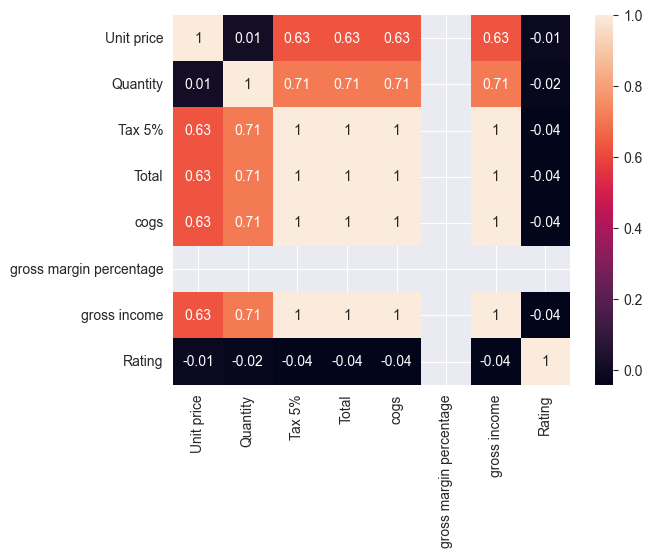

In [107]:
sns.heatmap(np.round(numeric_df.corr(),2), annot=True)